In [11]:
##tentative implémentation code Thibault

In [42]:
from collections import defaultdict
from collections import namedtuple
from collections import Counter
from tqdm import tqdm

from thibaultScript import (
    import_known_tokens,
    compile_scores,
    convert_raw#,
#    vjui
)

from pandas import DataFrame, Series
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


In [43]:
KNOWN_TOKENS, KNOWN_LEMMAS = import_known_tokens()

In [62]:
KNOWN_TOKENS

{'desfendonz',
 'amenissiez',
 'fius',
 'jostisse',
 'lauer',
 'banel',
 'doille',
 'befamie',
 'preinne',
 'gaie',
 'aquesteir',
 'conforté',
 'sucent',
 'voldra',
 'travaillent',
 'alions',
 'haie',
 'abandoneiz',
 'jakemes',
 'region',
 'pauluz',
 'atenu',
 'serviz',
 'debatuz',
 'toudroit',
 'apelle',
 'remuntez',
 'espriviers',
 'arabiz',
 'lixeir',
 'cheminei',
 'alfamie',
 'permettoient',
 'aresta',
 'faucons',
 'deçà',
 'freté',
 'vehue',
 'lise',
 'uo',
 'orferines',
 'desmanbré',
 'jeunoient',
 'comfaitement',
 'aleman',
 'citeainnez',
 'randonee',
 'couverture',
 'grapes',
 'esleüst',
 'a_corda',
 'usque',
 'comperra',
 'mariees',
 'arabe',
 'preudoume',
 'venues',
 'plegez',
 'asprés',
 'litel',
 'hastez',
 'departeriez',
 'refusasse',
 '.xii',
 'quinz',
 'vendroient',
 'tistrons',
 'leauté',
 'justisoit',
 'achete',
 'alexis',
 'meinsnez',
 'entamement',
 'ocur',
 '; / / :',
 'juignet',
 'façoiz',
 'ydoles',
 'reanbrai',
 'recommançoit',
 'atrui',
 'respondit',
 'redoit',


In [45]:
#TASKS = "lemma,Deg,Numb,Person,Mood_Tense_Voice,Case,Gend,pos".split(",")
TASKS = "lemma,POS".split(",")

In [46]:
Texts = []
GOLD = []

Milestones = set(list(range(0, 7270)))
nb_tokens = 0

def filter_gold(data):
    return [lst for lst in data if lst]


import regex

punkts = regex.compile(r"\W+")
greek = regex.compile(r"\p{Greek}+")

def keep_tokens(token):
    if greek.match(token):
        print(token)
        return False
    return True


with open("nca-sample-naomicorr.tsv") as f:
    header = []
    current_text = None
    for lineno, line in enumerate(f):
        line = line.strip().split("\t")
        if lineno == 0:
            header = line
            continue
            
        if lineno not in Milestones:
            continue
        
        line = dict(zip(header, line))
        
        if line["form"].startswith("[REF:"):
            GOLD = filter_gold(GOLD)
            Texts.append((line["form"], nb_tokens, len(GOLD)))
            GOLD.append([])
            continue
        
        if line["POS"] == "PUNC":
            if line["lemma"] in ".!?":
                if GOLD[-1] != []:
                    GOLD = filter_gold(GOLD)
                    GOLD.append([])
        elif keep_tokens(line["form"]):
            GOLD[-1].append(line)
            nb_tokens += 1
            

if GOLD[-1] == []:
    GOLD = GOLD[:-1]
print(f"{len(Texts)} texts found")
print(f"{len(GOLD)} sentences found")
TextsLengths = {
    
}
# Compute texts Lengths
for cur, nxt in zip(Texts, Texts[1:] + [None]):
    if nxt is None:
        TextsLengths[cur[0]] = nb_tokens - cur[1]
    else:
        TextsLengths[cur[0]] = nxt[1] - cur[1]
# Update titles
#TextsTitles = {
#    urn: f"{title} ({TextsLengths.get(urn, '?')} mots)"
#    for urn, title in TextsTitles.items()
#}
#print(TextsTitles)

62 texts found
62 sentences found


In [47]:
#mon ajout
TextsTitles = []


with open("nca-sample-naomicorr.tsv") as f:
    df = pd.read_csv(f, delimiter='\t')
    valList = df[df['form'].str.contains('REF', regex=False)]
    TextsTitles.append(valList["form"].str.extract(r'\[REF:(.*)\]'))

TextsTitles[0]

,0
0,ChastVergiS_A_69
123,PsLorrA_672
289,PerNeslesTabJ_602
340,MerlinP_956
456,MerlinP_1603
...,...
35337,YvainL;PercL_1311
35440,YvainL;PercL_1877
35557,CharroiSch_B2*_739
35685,VillehF_658


In [48]:
PLATINUM = convert_raw(GOLD, task_list=TASKS, lemma_fn=lambda x:x, form_fn=lambda x:x, 
                       pos_fn=lambda x:x, clitics_starts_with_accollade=True,
                      clitics_are_duplicate=True)

100%|█████████████████████████████████████████| 62/62 [00:00<00:00, 2349.56it/s]


In [49]:
TOKENS = [
    [x["form"] for x in sentence]
    for sentence in PLATINUM
]
TOKENS

[['Longue',
  'atente',
  'vous',
  'poroit',
  'nuire',
  ',',
  'ce',
  'm',
  '’',
  'est',
  'vis',
  ':',
  'si',
  'lo',
  'que',
  'vous',
  'soiiés',
  'amis',
  'en',
  'un',
  'haut',
  'liu',
  ',',
  'se',
  'vous',
  'veés',
  'que',
  'vous',
  'i',
  'soiiés',
  'bien',
  'amés',
  '.',
  '»',
  'Cil',
  'respont',
  ':',
  '«',
  'Ma',
  'dame',
  ',',
  'par',
  'foi',
  ',',
  'je',
  'ne',
  'sai',
  'mie',
  'bien',
  'por',
  'quoi',
  'ce',
  'me',
  'dites',
  'n',
  '’',
  'à',
  'coi',
  'ce',
  'monte',
  ',',
  'mais',
  'je',
  'ne',
  'sui',
  'ne',
  'rois',
  'ne',
  'conte',
  'qui',
  'si',
  'hautement',
  'amer',
  'doie',
  ',',
  'ne',
  'je',
  'n’',
  'en',
  'sui',
  'mie',
  'à',
  '.',
  'II',
  '.',
  'doie',
  'd',
  '’',
  'amer',
  'dame',
  'si',
  'soveraine',
  ',',
  'se',
  'je',
  'bien',
  'i',
  'metoie',
  'paine',
  '.',
  '-',
  'Si',
  'estes',
  ',',
  '»',
  'fait',
  'ele',
  ',',
  '«',
  'se',
  'devient',
  ';',
  'mainte'

In [50]:
TASKS

['lemma', 'POS']

In [51]:
from pie.tagger import Tagger
from pie.utils import chunks
DEVICE = "cpu"
BATCH_SIZE = 128


OUTPUT = []
TEST_NEW = True

#tagger = Tagger(device="cuda", batch_size=100, lower=False, tokenize=False)
tagger = Tagger(device=DEVICE, batch_size=BATCH_SIZE, lower=False, tokenize=False)
if TEST_NEW:
    for task in TASKS:
        tagger.add_model(f"modeles/{task}.tar", task)
#else:
#    tagger.add_model("../../../latin-lasla-models/lasla-plus.tar", *TASKS)


for chunk in tqdm(chunks([(sent, len(sent)) for sent in TOKENS], tagger.batch_size)):
    tagged, tasks = tagger.tag(*zip(*chunk))#, use_beam=True)
    OUTPUT.extend([
        [
            (token, dict(zip(tasks, result)))
            for token, result in sentence
        ]
        for sentence in tagged
    ])


1it [00:14, 14.64s/it]


In [52]:
from collections import defaultdict, Counter


RESULTS, RAW_SCORES, RAW_SCORES_NOT_EMPTY, ERRORS, SCORES_KNOWN = compile_scores(
    OUTPUT, PLATINUM, task_list=TASKS, known_tokens=KNOWN_TOKENS, known_lemmas=KNOWN_LEMMAS)

In [53]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tabulate import tabulate
from IPython.display import HTML, display

data = [["Task", "Accuracy", "Accuracy on V != _"]]


for task, (pred, truth) in RAW_SCORES.items():
    (pred_limited, truth_limited) = RAW_SCORES_NOT_EMPTY[task]
    data.append([
        task,
        "{0:.2f}".format(accuracy_score(truth, pred)*100),
        "{0:.2f}".format(accuracy_score(pred_limited, truth_limited)*100)
    ])
    
df = DataFrame([x[1:] for x in data[1:]], columns=data[0][1:], index=[x[0] for x in data[1:]]).sort_index()
display(HTML(df.to_html()))
#print(df.to_latex())



,Accuracy,Accuracy on V != _
POS,89.95,89.95
lemma,67.91,67.91


In [54]:
MilestonesSentences = [
    (tid, begin, end)
    for (tid, _, begin), (_, _, end) in zip(Texts, Texts[1:]+[(None, None, None)])
] # Those are sentences IDs

def count_tokens(begin, end):
    return len([tok for sent in PLATINUM[begin:end] for tok in sent])

MILESTONES = [count_tokens(beg, end) for _, beg, end in MilestonesSentences]
MILESTONES = [sum(MILESTONES[:index]) + value for index, value in enumerate(MILESTONES)]

SPLITS_TASK = {
    task: []
    for task in RAW_SCORES
}
SIZES = []


lengths = []
support_done = False
for task, (pred, truth) in RAW_SCORES.items():
    ms_start = 0
    for milestone in MILESTONES:
        SPLITS_TASK[task].append(accuracy_score(truth[ms_start:milestone], pred[ms_start:milestone]))
        length = milestone - ms_start + 1
        if not support_done:
            SIZES.append(length)
        ms_start = milestone
    support_done = True
    

In [55]:
MilestonesSentences[1][0]
#MILESTONES
#SIZES
#TextsTitles[tid]
#TextsTitles

'[REF:PsLorrA_672]'

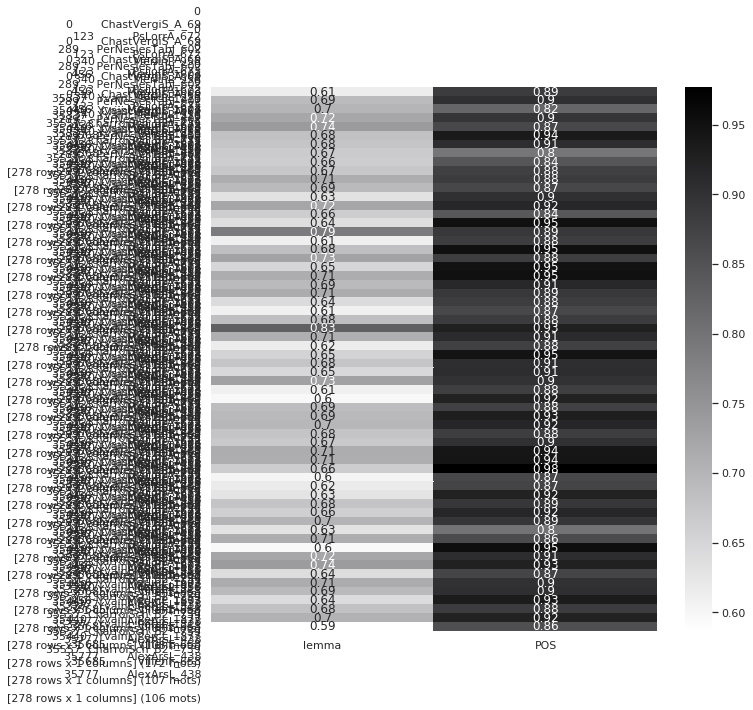

In [56]:


sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

DF_Tardif = DataFrame(SPLITS_TASK, index=[
    #"{} ({} mots)".format(TextsTitles[tid], length) for (tid, *_), length in zip(MilestonesSentences, SIZES)
    "{} ({} mots)".format(TextsTitles[0], length) for (*_), length in zip(MilestonesSentences, SIZES)
])

plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(DF_Tardif, annot=True, cmap=cmap)



In [57]:
PLATINUM_NOMpro = convert_raw(GOLD, task_list=TASKS, lemma_fn= lambda x:x, form_fn= lambda x:x, 
                              pos_fn=lambda x: x,
                             clitics_are_duplicate=False, clitics_starts_with_accollade=False, 
                              clitics_starts_with_dash=False, remove_disambiguation=False)

100%|█████████████████████████████████████████| 62/62 [00:00<00:00, 5440.31it/s]


In [58]:


from collections import defaultdict

# Dict[Text_id, Dict[POS, [0, 1]]] where 0 = false, 1 = true
Stats_Per_Pos = defaultdict(lambda :defaultdict(list))
_, Scores_Nom_Pro, *_, Score_Knowns = compile_scores(OUTPUT, PLATINUM_NOMpro, 
                                                     task_list=TASKS)#, known_tokens=KNOWN_TOKENS, 
                                                    #known_lemmas=KNOWN_LEMMAS)


start = 0
for text_id, end in enumerate(MILESTONES):
    for (lemma_pred, lemma_truth,  pos_truth) in zip(
        Scores_Nom_Pro["lemma"][0][start:end],
        Scores_Nom_Pro["lemma"][1][start:end],
        Scores_Nom_Pro["POS"][1][start:end]
    ):
        Stats_Per_Pos[text_id][pos_truth].append(int(lemma_pred == lemma_truth))
    start = end



In [59]:

TextInformation = namedtuple("TextInformation", ["title", "size", "error_rate"])
TextTitleSize = [
    #TextInformation(TextsTitles[tid], length, 1-accuracy) 
    TextInformation(TextsTitles[0], length, 1-accuracy) 
    #for (tid, *_), length, accuracy in zip(
    for (TextsTitles[0],*_), length, accuracy in zip(
        MilestonesSentences, SIZES, SPLITS_TASK["lemma"]
    )
]

LIMIT_TO_POS = {"VER", "NOMcom", "NOMpro", "PROrel", "ADJqua"}


def compute_accuracy(trues, corpus_size, corpus_accuracy) -> int:
    return ((len(trues) - sum(trues)) / corpus_size) / corpus_accuracy

Impact_Acc_Per_Pos = DataFrame({
    f"{TextTitleSize[text_id].title}\n (Error Rate: {TextTitleSize[text_id].error_rate*100:.1f}%)": {
        pos: compute_accuracy(equals, TextTitleSize[text_id].size, TextTitleSize[text_id].error_rate)
        for pos, equals in texts_values.items()
        if pos in LIMIT_TO_POS
    }
    for text_id, texts_values in Stats_Per_Pos.items()
}).transpose()
Impact_Acc_Per_Pos

,ADJqua,NOMcom,PROrel,NOMpro
[REF:ChastVergiS_A_69]\n (Error Rate: 38.5%),0.000000,0.042207,0.021104,NaN
[REF:PsLorrA_672]\n (Error Rate: 30.9%),0.038979,0.214387,0.000000,NaN
[REF:PerNeslesTabJ_602]\n (Error Rate: 30.0%),0.000000,0.130719,NaN,0.261438
[REF:MerlinP_956]\n (Error Rate: 27.8%),0.030981,0.061961,0.000000,0.030981
[REF:MerlinP_1603]\n (Error Rate: 26.1%),0.063978,0.095968,0.031989,0.063978
...,...,...,...,...
[REF:IpH_603]\n (Error Rate: 30.8%),0.000000,0.154762,NaN,0.061905
[REF:IpH_3634]\n (Error Rate: 35.8%),0.026070,0.052140,0.026070,0.026070
[REF:IpH_3829]\n (Error Rate: 31.9%),0.000000,0.027534,0.055068,0.082602
[REF:IpH_5979]\n (Error Rate: 29.5%),0.031954,0.063907,0.031954,0.127815


In [60]:
##mes modifs
Impact_Acc_Per_Pos2 = Impact_Acc_Per_Pos.reset_index(level=0)
Impact_Acc_Per_Pos3 = Impact_Acc_Per_Pos2['index'].str.split('\n', expand=True)
Impact_Acc_Per_Pos3

,0,1
0,[REF:ChastVergiS_A_69],(Error Rate: 38.5%)
1,[REF:PsLorrA_672],(Error Rate: 30.9%)
2,[REF:PerNeslesTabJ_602],(Error Rate: 30.0%)
3,[REF:MerlinP_956],(Error Rate: 27.8%)
4,[REF:MerlinP_1603],(Error Rate: 26.1%)
...,...,...
57,[REF:IpH_603],(Error Rate: 30.8%)
58,[REF:IpH_3634],(Error Rate: 35.8%)
59,[REF:IpH_3829],(Error Rate: 31.9%)
60,[REF:IpH_5979],(Error Rate: 29.5%)


In [243]:
Impact_Acc_Per_Pos3["error"] = Impact_Acc_Per_Pos3[1].str.extract(r'\(Error Rate: (.*)%\)')
Impact_Acc_Per_Pos3.index = Impact_Acc_Per_Pos3[0].str.extract(r'\[REF:(.*)\]')
Impact_Acc_Per_Pos3
type(Impact_Acc_Per_Pos3)
#Impact_Acc_Per_Pos3["error"]

pandas.core.frame.DataFrame

In [244]:
Impact_Acc_Per_Pos3[Impact_Acc_Per_Pos3["error"]].astype(float)

KeyError: "None of [Index(['53.3', '38.2', '32.0', '44.3', '38.7', '37.3', '42.4', '42.6', '41.0',\n       '43.9', '40.4', '49.1', '47.4', '36.1', '39.6', '44.1', '30.3', '50.5',\n       '45.5', '40.0', '48.5', '39.2', '36.8', '47.1', '44.2', '45.7', '40.8',\n       '29.3', '36.6', '40.2', '32.7', '41.0', '40.3', '42.0', '47.0', '42.4',\n       '41.8', '40.3', '46.8', '41.9', '49.6', '40.4', '41.1', '46.5', '48.0',\n       '43.6', '42.9', '41.2', '41.2', '39.4', '42.1', '29.8', '46.0', '42.6',\n       '33.6', '42.2', '41.5', '39.4', '38.7', '46.9', '39.0', '44.2'],\n      dtype='object')] are in the [columns]"

In [239]:
Impact_Acc_Per_Pos4 = Impact_Acc_Per_Pos3["error"]
Impact_Acc_Per_Pos4
dfPlot = Impact_Acc_Per_Pos4[Impact_Acc_Per_Pos4.columns].astype(float)

AttributeError: 'Series' object has no attribute 'columns'

In [216]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
fig = plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(250, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
ax = sns.heatmap(Impact_Acc_Per_Pos4, annot=True)#, cmap=cmap)
ax.set_title("Pourcentage d'erreurs occasionnées par POS")
fig.show()

IndexError: Inconsistent shape between the condition and the input (got (62, 1) and (62,))

<Figure size 720x720 with 0 Axes>

In [223]:
TextTitleSize[text_id].size
TextTitleSize[text_id].error_rate
Stats_Per_Pos.items

<function defaultdict.items>

In [237]:
ScatterPos = DataFrame([
    {
        "POS": pos,
        "Corpus": len(equals)/TextTitleSize[text_id].size, 
        "desErreurs": compute_accuracy(
            equals,
            TextTitleSize[text_id].size,
            TextTitleSize[text_id].error_rate
        )
    }
    for text_id, texts_values in Stats_Per_Pos.items()
        for pos, equals in texts_values.items()
        if pos in LIMIT_TO_POS
])

ScatterPos
#ScatterPos["Impact"] = ScatterPos["% des Erreurs"] / ScatterPos["% Corpus"] 

#texts_values.items
Stats_Per_Pos.items()

dict_items([(0, defaultdict(<class 'list'>, {'_': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]})), (1, defaultdict(<class 'list'>, {'_': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]})), (2, defaultdict(<class 'list'>, {'_': [1,

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), dpi=300)
# Draw plotbot
ScatterPos.boxplot(ax=ax1, column="Impact", by="POS")
ax1.set_title(label="")
ax1.axhline(y=1, label="Distribution normale", linestyle=":")
ax1.set_ylabel("Impact")
# ax1.text(y=0.8, x=5.6, s="Distribution\nnormale")
ax1.grid(True, color='b', linestyle='--', linewidth=0.2)

# Draw scatter
ax2 = sns.scatterplot(
    x="% Corpus", y="% des Erreurs", style="POS", 
    data=ScatterPos, alpha=0.8,
    color="g",
    ax=ax2
)
x = np.linspace(0, 0.4)
line = ax2.plot(x, x, linestyle=':', color="b", label="Distribution\nnormale")
# line_patch = mpatches.Patch(color='blue', linestyle="--", label="Distribution\nnormale")

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0, handles=handles)

fig.suptitle("")
fig.show()

nompro =  ScatterPos.loc[ScatterPos["POS"]=="NOMpro"]["Impact"]
print(nompro.median())#, nompro)
nomcom =  ScatterPos.loc[ScatterPos["POS"]=="NOMcom"]["Impact"]
print(nomcom.median())#, nomcom)
ver =  ScatterPos.loc[ScatterPos["POS"]=="VER"]["Impact"]
print(nomcom.median())#, nomcom)

FullDistrib = DataFrame([
    {
        "POS": pos,
        "% Corpus": len(equals)/TextTitleSize[text_id].size, 
        "% des Erreurs": compute_accuracy(
            equals,
            TextTitleSize[text_id].size,
            TextTitleSize[text_id].error_rate
        )
    }
    for text_id, texts_values in Stats_Per_Pos.items()
        for pos, equals in texts_values.items()
])
FullDistrib["Impact"] = ScatterPos["% des Erreurs"] / ScatterPos["% Corpus"]
FDGB = FullDistrib.groupby("POS").median()
print(FDGB)